## 1. 데이터 준비

### 1) 데이터 로드 : dataframe

In [1]:
# import gc
# gc.collect()

54

In [2]:
data_dir = "./data/"
train_data = data_dir + "spam.csv" # https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [3]:
import pandas as pd

In [4]:
raw_df = pd.read_csv(train_data, encoding='latin-1')

In [5]:
raw_df.shape

(5572, 5)

In [6]:
raw_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
raw_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [8]:
raw_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
raw_df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### 2) 결측 데이터 처리

In [11]:
print(raw_df.isnull().values.any())
print(raw_df.isnull().sum())
raw_df.isnull().sum()[raw_df.isnull().sum().values > 0]

False
v1    0
v2    0
dtype: int64


Series([], dtype: int64)

### 3) 중복 데이터 제거

In [12]:
duplicatedRow = raw_df[raw_df.duplicated()]
print(duplicatedRow[:5])
# duplicatedRow
len(duplicatedRow)

      v1                                                 v2
102  ham  As per your request 'Melle Melle (Oru Minnamin...
153  ham  As per your request 'Melle Melle (Oru Minnamin...
206  ham  As I entered my cabin my PA said, '' Happy B'd...
222  ham                             Sorry, I'll call later
325  ham                   No calls..messages..missed calls


403

In [13]:
raw_df.groupby('v1').describe().T

v1                            ham  \
v2 count                     4825   
   unique                    4516   
   top     Sorry, I'll call later   
   freq                        30   

v1                                                      spam  
v2 count                                                 747  
   unique                                                653  
   top     Please call our customer service representativ...  
   freq                                                    4

In [14]:
dedupe_df = raw_df.drop_duplicates('v2', keep='first')

In [15]:
duplicatedRow_dedupe = dedupe_df[dedupe_df.duplicated()]
print(duplicatedRow_dedupe[:5])
# duplicatedRow
len(duplicatedRow_dedupe)

Empty DataFrame
Columns: [v1, v2]
Index: []


0

### 4) 워드 클라우드 표시

In [16]:
# Get all the ham and spam
ham_msg = raw_df[raw_df.v1 == 'ham']
spam_msg = raw_df[raw_df.v1 == 'spam']

In [17]:
import numpy as np

In [18]:
# print(pd.__version__) 버전이 0.24.1 이상이면 아래와 같이 사용 가능
# spam_msg_text = " ".join(spam_msg.v2.to_numpy().tolist())

# 버전이 0.24.1 보다 낮으면 아래와 같이 사용

# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(np.array(ham_msg.v2).tolist())
spam_msg_text = " ".join(np.array(spam_msg.v2).tolist())

In [19]:
# !pip install wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

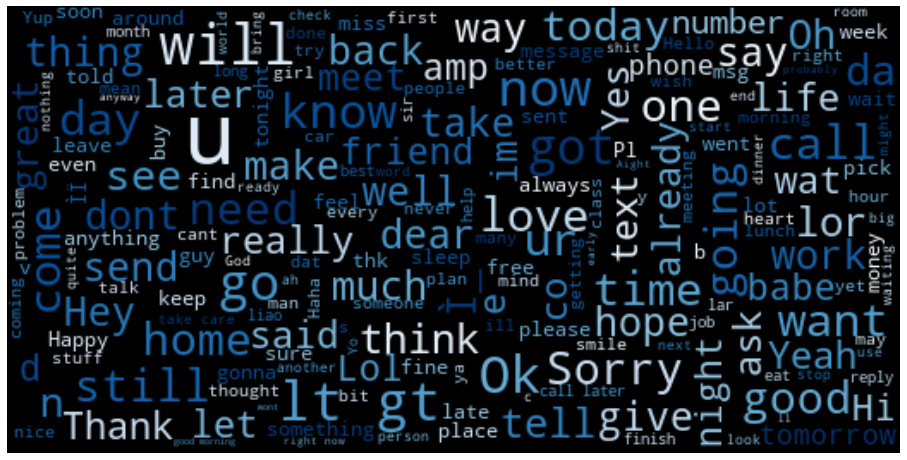

In [21]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

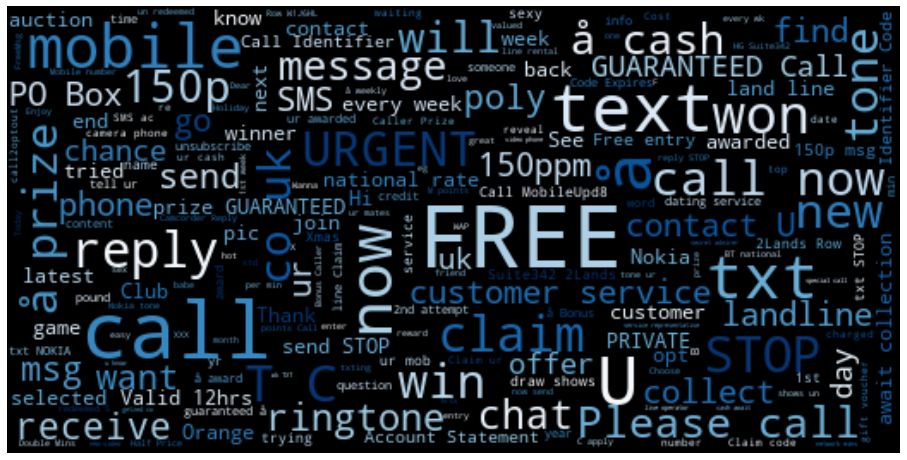

In [22]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

### 5) EDA(Exploratory Data Analysis)

In [23]:
from collections import Counter #데이터 전처리

Counter(dedupe_df['v1'])

Counter({'ham': 4516, 'spam': 653})

In [24]:
653/4516

0.1445969884853853

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='v1', ylabel='count'>

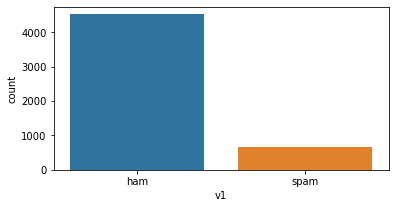

In [26]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(dedupe_df['v1'])

#### 글자 수 분석

In [27]:
train_length = dedupe_df['v2'].apply(len)

train_length.head()

0    111
1     29
2    155
3     49
4     61
Name: v2, dtype: int64

In [28]:
dedupe_df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of text')

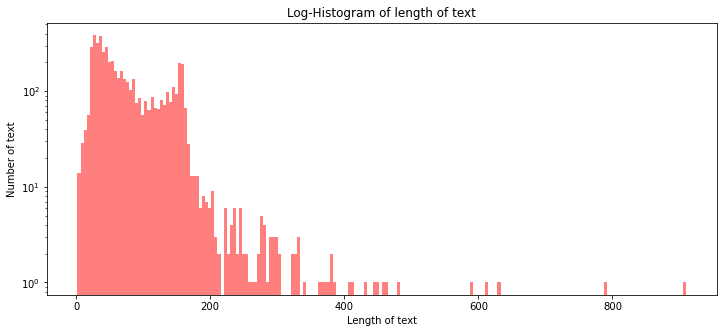

In [29]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of text')
# 그래프 x 축 라벨
plt.xlabel('Length of text')
# 그래프 y 축 라벨
plt.ylabel('Number of text')

In [30]:
import numpy as np

In [31]:
print('문자 길이 최대 값: {}'.format(np.max(train_length)))
print('문자 길이 최소 값: {}'.format(np.min(train_length)))
print('문자 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문자 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문자 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문자 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문자 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문자 길이 최대 값: 910
문자 길이 최소 값: 2
문자 길이 평균 값: 78.98
문자 길이 표준편차: 58.23
문자 길이 중간 값: 60.0
문자 길이 제 1 사분위: 36.0
문자 길이 제 3 사분위: 117.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc17203cc50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc17202b510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc17203c890>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc17202bdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc171f29650>],
 'means': [<matplotlib.lines.Line2D at 0x7fc171f29210>]}

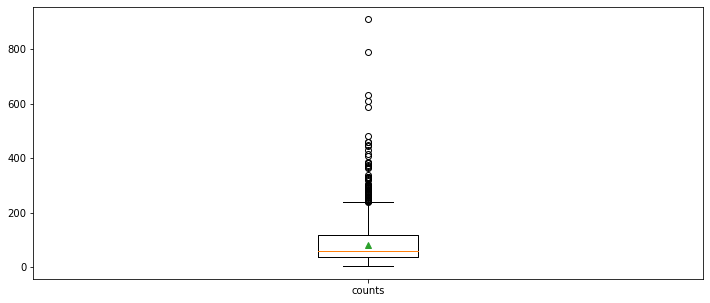

In [32]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

#### 단어수 분석

In [33]:
# 영문 데이터이므로 비칸을 기준으로 토크나이즈하고 카운팅
train_word_counts = dedupe_df['v2'].apply(lambda x:len(x.split(' ')))

In [34]:
train_word_counts.head()

0    20
1     6
2    28
3    11
4    13
Name: v2, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Number of text')

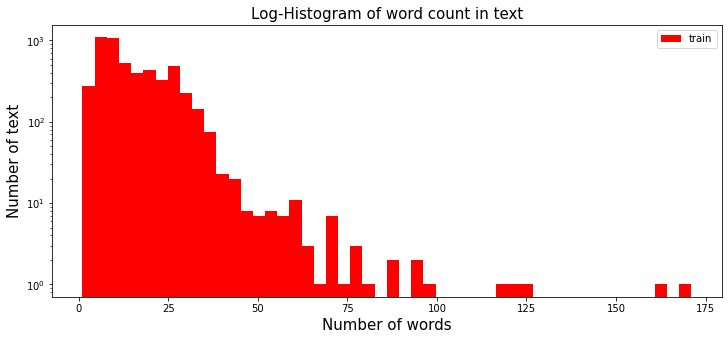

In [35]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in text', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of text', fontsize=15)

In [36]:
print('문자 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문자 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('문자 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문자 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문자 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문자 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문자 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

문자 단어 개수 최대 값: 171
문자 단어 개수 최소 값: 1
문자 단어 개수 평균 값: 15.46
문자 단어 개수 표준편차: 11.16
문자 단어 개수 중간 값: 12.0
문자 단어 개수 제 1 사분위: 7.0
문자 단어 개수 제 3 사분위: 22.0


In [37]:
qmarks = np.mean(dedupe_df['v2'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(dedupe_df['v2'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(dedupe_df['v2'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(dedupe_df['v2'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(dedupe_df['v2'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가 있는 문장: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 문장: {:.2f}%'.format(numbers * 100))

물음표가 있는 문장: 22.56%
마침표가 있는 문장: 64.73%
첫 글자가 대문자 인 문장: 94.20%
대문자가 있는 문장: 98.43%
숫자가 있는 문장: 25.56%


### 6) 인코딩

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
train_x = dedupe_df.v2
train_y = dedupe_df.v1

In [40]:
train_y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [41]:
le = LabelEncoder()

train_y_encoded = le.fit_transform(train_y)

In [42]:
train_y_encoded

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
len(train_y_encoded)

5169

In [44]:
# train_Y = train_y_encoded.reshape(-1,1)

In [45]:
# train_Y

In [46]:
train_x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [47]:
# library for train test split
from sklearn.model_selection import train_test_split

In [48]:
# Split data into train and test
train_x, test_x, train_y, test_y = train_test_split(dedupe_df['v2'], train_y_encoded, test_size=0.1, random_state=434)

#### Tokenization

In [49]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing import sequence

In [51]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_x)

In [52]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'in': 9,
 'is': 10,
 'me': 11,
 'my': 12,
 'for': 13,
 'your': 14,
 'it': 15,
 'of': 16,
 'have': 17,
 'that': 18,
 'call': 19,
 'on': 20,
 '2': 21,
 'are': 22,
 'now': 23,
 'so': 24,
 'but': 25,
 'not': 26,
 'can': 27,
 'at': 28,
 'or': 29,
 'be': 30,
 'do': 31,
 "i'm": 32,
 'get': 33,
 'will': 34,
 'if': 35,
 'just': 36,
 'we': 37,
 'with': 38,
 'no': 39,
 'this': 40,
 'ur': 41,
 'up': 42,
 'gt': 43,
 'lt': 44,
 '4': 45,
 'when': 46,
 'how': 47,
 'from': 48,
 'go': 49,
 'all': 50,
 'ok': 51,
 'what': 52,
 'free': 53,
 'out': 54,
 'know': 55,
 'got': 56,
 'then': 57,
 'good': 58,
 'like': 59,
 'come': 60,
 'time': 61,
 'was': 62,
 'its': 63,
 'only': 64,
 'am': 65,
 'day': 66,
 'there': 67,
 'want': 68,
 'love': 69,
 'he': 70,
 'text': 71,
 'send': 72,
 'going': 73,
 'need': 74,
 'by': 75,
 'one': 76,
 'as': 77,
 'lor': 78,
 'home': 79,
 'see': 80,
 'about': 81,
 'txt': 82,
 'still': 83,
 'stop': 84,
 

In [53]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 8399 unique tokens in training data. 


In [54]:
import json

In [55]:
tok_json = tokenizer.to_json()
# with io.open(DATA_IN_DIR + 'tokenizer_' + ver + '.json', 'w', encoding='utf-8') as f:
#     f.write(json.dumps(tokenizer_json, ensure_ascii=False))

tokenized_file = data_dir + 'tokenized.json'
json.dump(tok_json, open(tokenized_file, 'w'), ensure_ascii=False)

# 읽는 방법
'''
tok_configs = None
with open(tokenized_file, 'r') as f:
    tok_configs = json.load(f)
'''
# keras.preprocessing.text.tokenizer_from_json(json_string)
'''
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)
'''

"\nwith open('tokenizer.json') as f:\n    data = json.load(f)\n    tokenizer = tokenizer_from_json(data)\n"

#### Sequencing and Padding

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
train_x

2901    Bill, as in: Are there any letters for me. iÛ...
3903    Your 2004 account for 07XXXXXXXXX shows 786 un...
4818                Got smaller capacity one? Quite ex...
5300                              I can't make it tonight
3796    For The First Time In The History 'Need' 'Comf...
                              ...                        
912     Can't. I feel nauseous. I'm so pissed. I didn'...
5398    Hi. Hope you had a good day. Have a better night.
1390    I wonder how you got online, my love ? Had you...
3375    Good afternon, my love. How are today? I hope ...
1871    Dont know supports ass and srt i thnk. I think...
Name: v2, Length: 4652, dtype: object

In [58]:
train_y

array([0, 1, 0, ..., 0, 0, 0])

In [59]:
training_sequences = tokenizer.texts_to_sequences(train_x)

In [60]:
training_sequences

[[1,
  77,
  9,
  22,
  67,
  95,
  1,
  13,
  11,
  1,
  1,
  76,
  48,
  424,
  18,
  1,
  5,
  1,
  25,
  263,
  83,
  163,
  424,
  20,
  15],
 [14, 1, 325, 13, 1, 342, 1, 1, 1, 3, 137, 19, 1, 1, 388, 1, 1, 1, 1, 1],
 [56, 1, 1, 76, 352, 1],
 [2, 223, 140, 15, 215],
 [13,
  6,
  204,
  61,
  9,
  6,
  1,
  1,
  1,
  8,
  1,
  22,
  1,
  28,
  259,
  1,
  9,
  1,
  1,
  1,
  44,
  43,
  1,
  1,
  44,
  43,
  1,
  1,
  44,
  43,
  1,
  44,
  43],
 [86, 10, 58, 58, 1, 169, 70, 10, 1],
 [200,
  37,
  22,
  275,
  3,
  201,
  7,
  1,
  295,
  342,
  18,
  4,
  17,
  208,
  5,
  1,
  152,
  285,
  19,
  1,
  48,
  1,
  343,
  137,
  1,
  1,
  1,
  64],
 [1,
  1,
  16,
  192,
  156,
  131,
  259,
  202,
  25,
  2,
  56,
  442,
  21,
  344,
  7,
  27,
  252,
  16,
  121,
  21,
  49,
  215,
  29,
  7,
  141,
  496,
  1,
  9,
  345],
 [68, 3, 72, 11, 5, 1, 1, 2, 74, 76],
 [36, 205, 497, 313, 16, 1, 46, 1, 1, 1, 1, 124],
 [240, 13, 14, 19],
 [124, 12, 443, 32, 1, 79],
 [100, 224, 40, 1, 99, 1

In [61]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_x)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_x)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [62]:
train_x[2901]

'Bill, as in: Are there any letters for me. i\x89Ûªm expecting one from orange that isn\x89Ûªt a bill but may still say orange on it.'

In [63]:
train_x[1]

'Ok lar... Joking wif u oni...'

In [64]:
training_sequences[0] # 확인

[1,
 77,
 9,
 22,
 67,
 95,
 1,
 13,
 11,
 1,
 1,
 76,
 48,
 424,
 18,
 1,
 5,
 1,
 25,
 263,
 83,
 163,
 424,
 20,
 15]

In [65]:
text = tokenizer.sequences_to_texts([training_sequences[0]]) # 역으로 문장 확인
text

['<OOV> as in are there any <OOV> for me <OOV> <OOV> one from orange that <OOV> a <OOV> but may still say orange on it']

In [66]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (4652, 50)
Shape of testing tensor:  (517, 50)


In [67]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(25, 20)

In [68]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [69]:
print(training_padded[0])

[  1  77   9  22  67  95   1  13  11   1   1  76  48 424  18   1   5   1
  25 263  83 163 424  20  15   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


### 7) 모델 만들기와 트레이닝

In [70]:
train_X = training_padded

In [71]:
train_X

array([[  1,  77,   9, ...,   0,   0,   0],
       [ 14,   1, 325, ...,   0,   0,   0],
       [ 56,   1,   1, ...,   0,   0,   0],
       ...,
       [  2,   1,  47, ...,   0,   0,   0],
       [ 58,   1,  12, ...,   0,   0,   0],
       [ 98,  55,   1, ...,   0,   0,   0]], dtype=int32)

In [72]:
train_X.shape

(4652, 50)

In [73]:
train_Y = train_y

In [74]:
train_Y.shape

(4652,)

In [75]:
x_df = pd.DataFrame(train_X)

In [76]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,77,9,22,67,95,1,13,11,1,...,0,0,0,0,0,0,0,0,0,0
1,14,1,325,13,1,342,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
2,56,1,1,76,352,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,223,140,15,215,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,6,204,61,9,6,1,1,1,8,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y_df = pd.DataFrame({'label': train_Y})

In [78]:
y_df.head()

,label
0,0
1,1
2,0
3,0
4,0


In [79]:
merged_df = pd.merge(y_df, x_df, left_index=True, right_index=True, how='left')

In [80]:
merged_df

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,1,77,9,22,67,95,1,13,11,...,0,0,0,0,0,0,0,0,0,0
1,1,14,1,325,13,1,342,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,56,1,1,76,352,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,223,140,15,215,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,13,6,204,61,9,6,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0,223,2,250,1,32,24,1,2,276,...,0,0,0,0,0,0,0,0,0,0
4648,0,101,116,4,138,5,58,66,17,5,...,0,0,0,0,0,0,0,0,0,0
4649,0,2,1,47,4,56,1,12,69,138,...,0,0,0,0,0,0,0,0,0,0
4650,0,58,1,12,69,47,22,88,2,116,...,0,0,0,0,0,0,0,0,0,0


In [81]:
merged_df.to_csv(data_dir + 'encoded-spam.csv', index = False)

In [82]:
test_X = testing_padded

In [83]:
test_Y = test_y

In [84]:
print(test_X.shape, test_Y.shape)

(517, 50) (517,)


In [85]:
tx_df = pd.DataFrame(test_X)
ty_df = pd.DataFrame({'label': test_Y})

In [86]:
merged_tdf = pd.merge(ty_df, tx_df, left_index=True, right_index=True, how='left')

In [87]:
merged_tdf

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,2,69,7,21,12,405,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4,119,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,97,1,10,1,401,17,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,47,22,4,156,116,1,1,9,13,...,0,0,0,0,0,0,0,0,0,0
4,1,82,19,3,39,1,137,14,1,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,99,96,19,4,133,2,65,9,330,...,0,0,0,0,0,0,0,0,0,0
513,0,118,2,34,30,155,1,258,4,68,...,0,0,0,0,0,0,0,0,0,0
514,1,1,4,22,431,5,1,1,1,19,...,0,0,0,0,0,0,0,0,0,0
515,0,8,175,1,6,1,8,1,1,7,...,0,0,0,0,0,0,0,0,0,0


In [88]:
merged_tdf.to_csv(data_dir + 'encoded-spam-test.csv', index = False)